作业1：使用云端qwen-vl模型，完成图的分类，输入dog，识别 dog or cat？
https://bailian.console.aliyun.com/?tab=model#/efm/model_experience_center/vision

这张图片中是一只狗，而不是猫。以下是一些明显的特征，可以帮助我们确定这一点：

1. **毛发**：这只动物的毛发较长且柔软，符合狗的特征，尤其是像金毛寻回犬这样的品种。

2. **面部特征**：它的面部表情非常友好，嘴巴张开，露出牙齿和舌头，这是狗常见的微笑表情。猫通常不会以这种方式微笑。

3. **耳朵**：它的耳朵是竖立的，形状圆润，这也是狗的典型特征。

4. **体型**：从图片中可以看出，它的体型适中，符合中小型犬的特征。

5. **项圈**：它脖子上戴着一个项圈，这是狗经常佩戴的物品，用于牵引或标识。

6. **背景**：背景中可以看到书架和宠物床，这些通常是家庭环境中的物品，而狗作为家庭宠物更为常见。

综上所述，这张图片中的动物是一只狗。


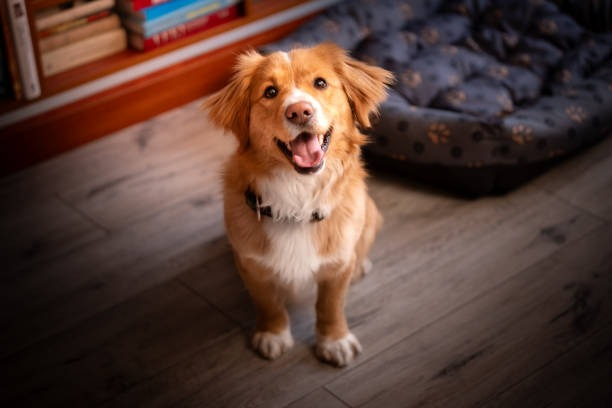

In [27]:
import os
from openai import OpenAI
import base64
from PIL import Image
# 将本地图片转换为base64编码
def image_to_base64(image_path):
    with open(image_path, "rb") as image_file:
        encoded_string = base64.b64encode(image_file.read()).decode('utf-8')
    return encoded_string

# 使用base64编码的图片
image_path = r"C:\Users\52564\Desktop\4ed55d96398f248502daee120e9076e6~tplv-be4g95zd3a-image.jpeg"
base64_image = image_to_base64(image_path)

client = OpenAI(
    # 若没有配置环境变量，请用百炼API Key将下行替换为：api_key="sk-xxx",
    # api_key=os.getenv("DASHSCOPE_API_KEY")
    api_key='sk-67a5c9ec491c4832b45b0cbb567bc67f',
    base_url="https://dashscope.aliyuncs.com/compatible-mode/v1",
)
completion = client.chat.completions.create(
    model="qwen-vl-plus",  # 此处以qwen-vl-plus为例，可按需更换模型名称。模型列表：https://help.aliyun.com/zh/model-studio/getting-started/models
    messages=[{"role": "user","content": [
            {"type": "image_url",
             "image_url": {"url": f"data:image/png;base64,{base64_image}"}},
            {"type": "text", "text": "图片中是狗还是猫？"},
            ]}]
    )
# print(completion.model_dump_json())
print(completion.choices[0].message.content)
Image.open(image_path)

作业2：使用云端qwen-vl模型，完成带文字截图的图，文本的解析转换为文本。。


图片中的文字内容如下：

```python
client = OpenAI(
    # 若没有配置环境变量，请用百炼API Key将下行替换为: api_key="sk-xxx",
    # api_key=os.getenv("DASHSCOPE_API_KEY", "sk-6c9ec491c4832b4bb567bcf"),
    base_url="https://dashscope.aliyuncs.com/compatible-mode/v1",
    model="qwen-vl-plus",  # 此处以qwen-vl-plus为例，可按需更换模型名称。模型列表：https://help.aliyun.com/document_detail/260029.html?spm=a2c4g.26111887.0.0.7e4a5d8dLzZzZz#section-1m5-1z1-1bz
    {
        "image_url": {"url": "https://dashscope.oss-cn-beijing.aliyuncs.com/images/dog_and_girl.jpg"},
    }
)
# print(completion.model_dump_json())
# print(completion.choices[0].message.content)
```

这段代码是使用OpenAI API进行图像处理的示例，具体使用了Qwen-VL-Plus模型，并指定了一个图像URL。


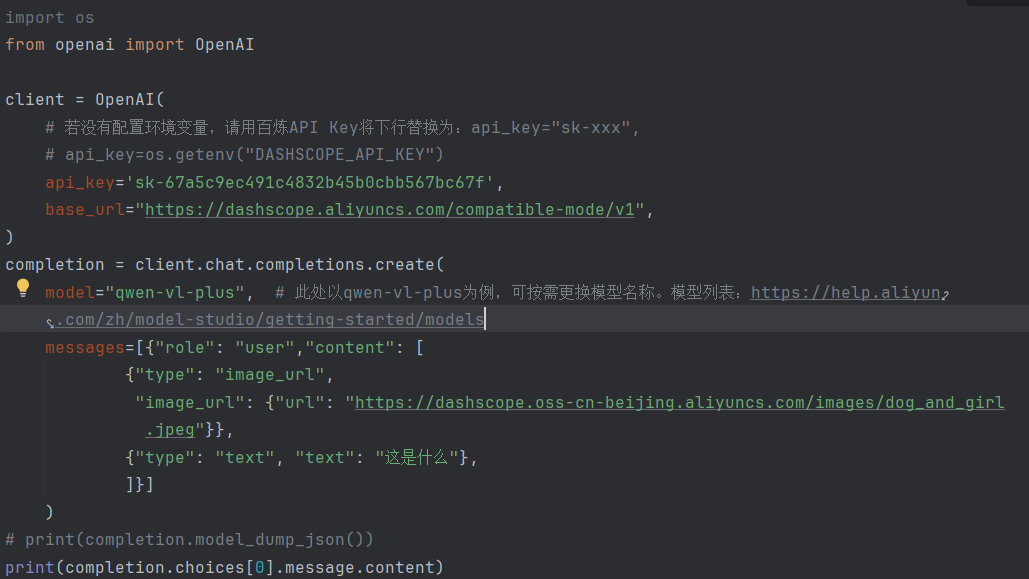

In [23]:
import os
from openai import OpenAI
import base64
import matplotlib.pyplot as plt
from PIL import Image

# 将本地图片转换为base64编码
def image_to_base64(image_path):
    with open(image_path, "rb") as image_file:
        encoded_string = base64.b64encode(image_file.read()).decode('utf-8')
    return encoded_string

# 使用base64编码的图片
image_path = "C:\\Users\\52564\\Desktop\\ScreenShot_2025-11-04_110952_070.png"
base64_image = image_to_base64(image_path)

client = OpenAI(
    # 若没有配置环境变量，请用百炼API Key将下行替换为：api_key="sk-xxx",
    # api_key=os.getenv("DASHSCOPE_API_KEY")
    api_key='sk-67a5c9ec491c4832b45b0cbb567bc67f',
    base_url="https://dashscope.aliyuncs.com/compatible-mode/v1",
)
completion = client.chat.completions.create(
    model="qwen-vl-plus",  # 此处以qwen-vl-plus为例，可按需更换模型名称。模型列表：https://help.aliyun.com/zh/model-studio/getting-started/models
    messages=[{"role": "user","content": [
            {"type": "image_url",
             "image_url": {"url": f"data:image/png;base64,{base64_image}"}},
            {"type": "text", "text": "提取图片中的文字"},
            ]}]
    )
# print(completion.model_dump_json())
print(completion.choices[0].message.content)
Image.open(image_path)